# TER: Aide à l’orientation dans le supérieur : ANN (3 classes)

Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/Colab Notebooks/TER/" 

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

### Selection du nouveau train set et test set précédemment générés 


In [3]:
# données de train
df1_train = pd.read_csv(path+'generated_data_class3/train1.csv')
df2_train = pd.read_csv(path+'generated_data_class3/train2.csv')
df3_train = pd.read_csv(path+'generated_data_class3/train3.csv')
df4_train = pd.read_csv(path+'generated_data_class3/train4.csv')
df5_train = pd.read_csv(path+'generated_data_class3/train5.csv')
df6_train = pd.read_csv(path+'generated_data_class3/train6.csv')
df7_train = pd.read_csv(path+'generated_data_class3/train7.csv')
df8_train = pd.read_csv(path+'generated_data_class3/train8.csv')
df9_train = pd.read_csv(path+'generated_data_class3/train9.csv')
df10_train = pd.read_csv(path+'generated_data_class3/train10.csv')
df11_train = pd.read_csv(path+'generated_data_class3/train11.csv')
df12_train = pd.read_csv(path+'generated_data_class3/train12.csv')
df13_train = pd.read_csv(path+'generated_data_class3/train13.csv')
df14_train = pd.read_csv(path+'generated_data_class3/train14.csv')
df15_train = pd.read_csv(path+'generated_data_class3/train15.csv')

#données de test
df1_test = pd.read_csv(path+'generated_data_class3/test1.csv')
df2_test = pd.read_csv(path+'generated_data_class3/test2.csv')
df3_test = pd.read_csv(path+'generated_data_class3/test3.csv')
df4_test = pd.read_csv(path+'generated_data_class3/test4.csv')
df5_test = pd.read_csv(path+'generated_data_class3/test5.csv')
df6_test = pd.read_csv(path+'generated_data_class3/test6.csv')
df7_test = pd.read_csv(path+'generated_data_class3/test7.csv')
df8_test = pd.read_csv(path+'generated_data_class3/test8.csv')
df9_test = pd.read_csv(path+'generated_data_class3/test9.csv')
df10_test = pd.read_csv(path+'generated_data_class3/test10.csv')
df11_test = pd.read_csv(path+'generated_data_class3/test11.csv')
df12_test = pd.read_csv(path+'generated_data_class3/test12.csv')
df13_test = pd.read_csv(path+'generated_data_class3/test13.csv')
df14_test = pd.read_csv(path+'generated_data_class3/test14.csv')
df15_test = pd.read_csv(path+'generated_data_class3/test15.csv')

df_train = [df1_train,df2_train,df3_train,df4_train,df5_train,df6_train,df7_train,df8_train,df9_train,df10_train,df11_train,df12_train,df13_train,df14_train,df15_train]
df_test = [df1_test,df2_test,df3_test,df4_test,df5_test,df6_test,df7_test,df8_test,df9_test,df10_test,df11_test,df12_test,df13_test,df14_test,df15_test]

In [4]:
#résultats des élèves classe 0(echecs) ou 1(reussites) ou 2(moyens)
y_col = 'resultats_iut_tdats1'

### Prepare data

In [5]:
X_train,y_train,X_test,y_test = [],[],[],[]

for i in range(15):
    dfi_train = df_train[i]
    dfi_test = df_test[i]
    y_train.append(dfi_train[y_col])
    X_train.append(dfi_train[dfi_train.columns.drop(y_col)])
    y_test.append(dfi_test[y_col])
    X_test.append(dfi_test[dfi_test.columns.drop(y_col)])
    sc = StandardScaler()
    X_train[i] = sc.fit_transform(X_train[i])
    X_test[i] = sc.transform(X_test[i])


## Metrics


In [6]:
from keras import backend as K

def recall(y_true, y_pred):
    y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))

    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2*((p*r)/(p+r+K.epsilon()))

### Réseau de neurones:

In [7]:
#Initialising ANN
ann1 = tf.keras.models.Sequential()
ann2 = tf.keras.models.Sequential()
ann3 = tf.keras.models.Sequential()
ann4 = tf.keras.models.Sequential()
ann5 = tf.keras.models.Sequential()
ann6 = tf.keras.models.Sequential()
ann7 = tf.keras.models.Sequential()
ann8 = tf.keras.models.Sequential()
ann9 = tf.keras.models.Sequential()
ann10 = tf.keras.models.Sequential()
ann11 = tf.keras.models.Sequential()
ann12 = tf.keras.models.Sequential()
ann13 = tf.keras.models.Sequential()
ann14 = tf.keras.models.Sequential()
ann15 = tf.keras.models.Sequential()

ANN = [ann1,ann2,ann3,ann4,ann5,ann6,ann7,ann8,ann9,ann10,ann11,ann12,ann13,ann14,ann15]

activ = "relu"
from keras.layers import LeakyReLU
for i in range(len(ANN)):
    #Adding First Hidden Layer
    ANN[i].add(tf.keras.layers.Dense(units=100,activation=activ))
    #Dropout to avoid over-fitting
    ANN[i].add(tf.keras.layers.Dropout(rate = 0.1)) 
    #Adding Second Hidden Layer
    ANN[i].add(tf.keras.layers.Dense(units=10,activation=activ))
    #Dropout to avoid over-fitting
    ANN[i].add(tf.keras.layers.Dropout(rate = 0.1))
    #Adding Output Layer
    ANN[i].add(tf.keras.layers.Dense(1,activation="sigmoid"))
    #Compiling ANN
    #ANN[i].compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),loss="categorical_crossentropy",metrics=['accuracy', f1_score, precision, recall])
    ANN[i].compile(optimizer="adam",loss="mse",metrics=['accuracy', f1_score, precision, recall])

### Entrainement avec les 15 datasets

In [8]:
#Fitting ANN
epoch = 10
history = []

for i in range(15):
    history.append(ANN[i].fit(X_train[i], y_train[i], validation_data=[X_test[i],y_test[i]], batch_size=32, epochs=epoch))

Epoch 1/10
3/3 [==============================] - 2s 160ms/step - loss: 0.6921 - accuracy: 0.4574 - f1_score: 0.6965 - precision: 1.0000 - recall: 0.5410 - val_loss: 0.6043 - val_accuracy: 0.4878 - val_f1_score: 0.8286 - val_precision: 1.0000 - val_recall: 0.7083
Epoch 2/10
3/3 [==============================] - 0s 32ms/step - loss: 0.3737 - accuracy: 0.6809 - f1_score: 0.8658 - precision: 1.0000 - recall: 0.7646 - val_loss: 0.5043 - val_accuracy: 0.6098 - val_f1_score: 0.9129 - val_precision: 1.0000 - val_recall: 0.8420
Epoch 3/10
3/3 [==============================] - 0s 34ms/step - loss: 0.2965 - accuracy: 0.7553 - f1_score: 0.8608 - precision: 1.0000 - recall: 0.7562 - val_loss: 0.4571 - val_accuracy: 0.6341 - val_f1_score: 0.9545 - val_precision: 1.0000 - val_recall: 0.9132
Epoch 4/10
3/3 [==============================] - 0s 31ms/step - loss: 0.2780 - accuracy: 0.7447 - f1_score: 0.8602 - precision: 1.0000 - recall: 0.7549 - val_loss: 0.4310 - val_accuracy: 0.6585 - val_f1_score:

### Valeurs des métriques pour chaque dataset

In [9]:
best_train_accuracy = []
best_test_accuracy = []
best_train_f1_score = []
best_test_f1_score = []
best_train_precision = []
best_test_precision = []
best_train_recall = []
best_test_recall = []

for i in range(15):
    best_train_accuracy.append(history[i].history['accuracy'][np.argmin(history[i].history['loss'])])
    best_test_accuracy.append(history[i].history['val_accuracy'][np.argmin(history[i].history['val_loss'])])
    best_train_f1_score.append(history[i].history['f1_score'][np.argmin(history[i].history['loss'])])
    best_test_f1_score.append(history[i].history['val_f1_score'][np.argmin(history[i].history['val_loss'])])
    best_train_precision.append(history[i].history['precision'][np.argmin(history[i].history['loss'])])
    best_test_precision.append(history[i].history['val_precision'][np.argmin(history[i].history['val_loss'])])
    best_train_recall.append(history[i].history['recall'][np.argmin(history[i].history['loss'])])
    best_test_recall.append(history[i].history['val_recall'][np.argmin(history[i].history['val_loss'])])
    
    
for i in range(15):   
    print("best_train_accuracy for dataset",i+1," = ", best_train_accuracy[i])
    print("best_test_accuracy for dataset",i+1," = ", best_test_accuracy[i])
    print("best_train_f1_score for dataset",i+1," = ", best_train_f1_score[i])
    print("best_test_f1_score for dataset",i+1," = ", best_test_f1_score[i])
    print("best_train_precision for dataset",i+1," = ", best_train_precision[i])
    print("best_test_precision for dataset",i+1," = ", best_test_precision[i])
    print("best_train_recall for dataset",i+1," = ", best_train_recall[i])
    print("best_test_recall for dataset",i+1," = ", best_test_recall[i])
    print(" ")

best_train_accuracy for dataset 1  =  0.7659574747085571
best_test_accuracy for dataset 1  =  0.6585366129875183
best_train_f1_score for dataset 1  =  0.8602988123893738
best_test_f1_score for dataset 1  =  0.9626516699790955
best_train_precision for dataset 1  =  1.0
best_test_precision for dataset 1  =  1.0
best_train_recall for dataset 1  =  0.7562499642372131
best_test_recall for dataset 1  =  0.9288194179534912
 
best_train_accuracy for dataset 2  =  0.7765957713127136
best_test_accuracy for dataset 2  =  0.5853658318519592
best_train_f1_score for dataset 2  =  0.8512315154075623
best_test_f1_score for dataset 2  =  0.9544591307640076
best_train_precision for dataset 2  =  1.0
best_test_precision for dataset 2  =  1.0
best_train_recall for dataset 2  =  0.7430555820465088
best_test_recall for dataset 2  =  0.9131944179534912
 
best_train_accuracy for dataset 3  =  0.7340425252914429
best_test_accuracy for dataset 3  =  0.6341463327407837
best_train_f1_score for dataset 3  =  0.892

#### Moyenne des valeurs des métriques pour chaque Dataset

In [10]:
print("Mean of test accuracy for the 15 dataset = ", np.mean(best_test_accuracy))
print("Mean of test f1_score for the 15 dataset = ", np.mean(best_test_f1_score))
print("Mean of test precision for the 15 dataset = ", np.mean(best_test_precision))
print("Mean of test recall for the 15 dataset = ", np.mean(best_test_recall))

Mean of test accuracy for the 15 dataset =  0.6097560962041219
Mean of test f1_score for the 15 dataset =  0.9648996909459432
Mean of test precision for the 15 dataset =  1.0
Mean of test recall for the 15 dataset =  0.9339120268821717


## Metrics Visualization

In [11]:
n=2
def plot_metrics(hist):
    
    # summarize history for accuracy
    plt.subplot(n, 5, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(n, 5, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    
    # summarize history for f1_score
    plt.subplot(n, 5, 3)
    plt.plot(hist.history['f1_score'])
    plt.plot(hist.history['val_f1_score'])
    plt.title('f1_score')
    plt.ylabel('f1_score')
    plt.xlabel('epoch')
    
    # summarize history for precision
    plt.subplot(n, 5, 4)
    plt.plot(hist.history['precision'])
    plt.plot(hist.history['val_precision'])
    plt.title('precision')
    plt.ylabel('precision')
    plt.xlabel('epoch')
    
    # summarize history for recall
    plt.subplot(n, 5, 5)
    plt.plot(hist.history['recall'])
    plt.plot(hist.history['val_recall'])
    plt.title('recall')
    plt.ylabel('recall')
    plt.xlabel('epoch')
    
    plt.show()

DATASET 1


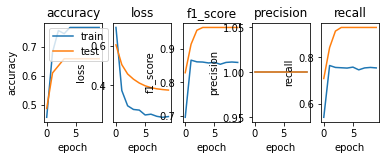

DATASET 2


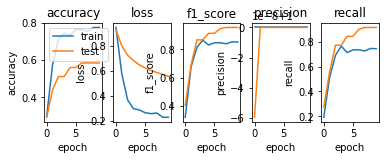

DATASET 3


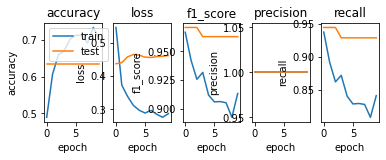

DATASET 4


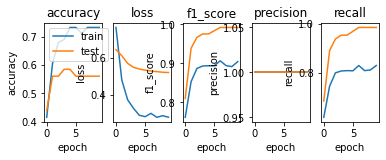

DATASET 5


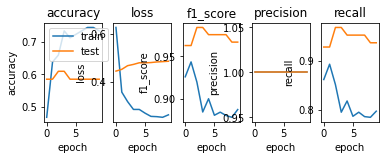

DATASET 6


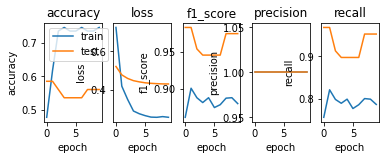

DATASET 7


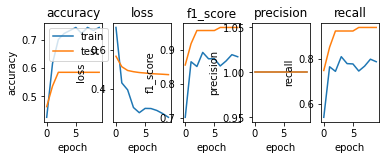

DATASET 8


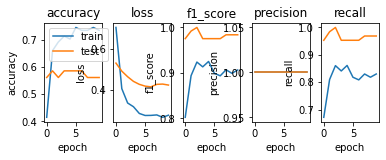

DATASET 9


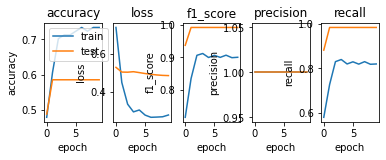

DATASET 10


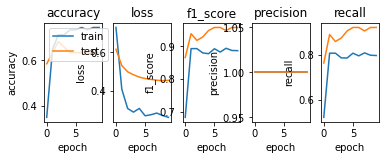

DATASET 11


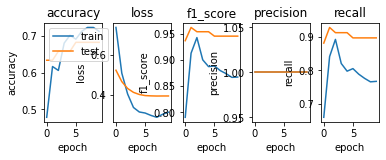

DATASET 12


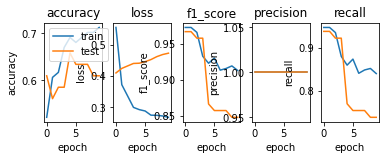

DATASET 13


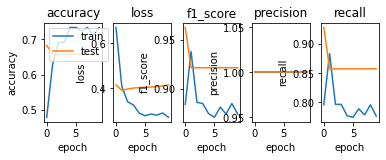

DATASET 14


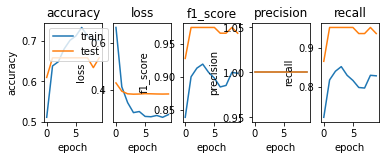

DATASET 15


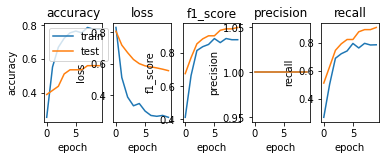

In [12]:
for i in range(15):    
    print("DATASET",i+1)
    plot_metrics(history[i])
    

### Matrice de Confusion

#### Matrice de Confusion du Test

2/2 [==============================] - 0s 4ms/step
DATASET 1


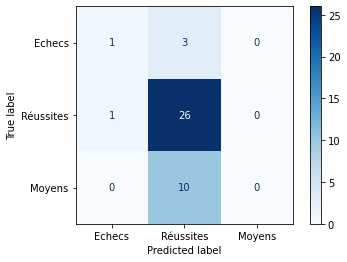

DATASET 2


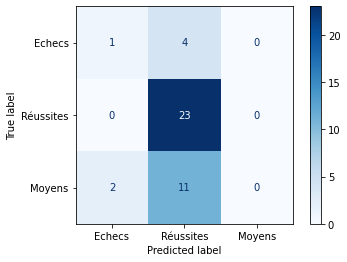

DATASET 3


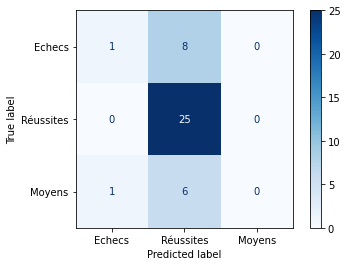

DATASET 4


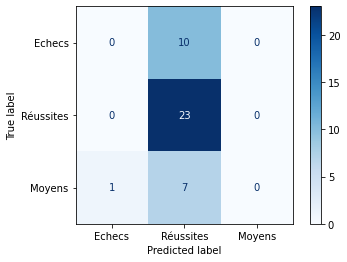

DATASET 5


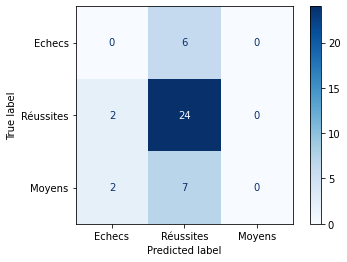

DATASET 6


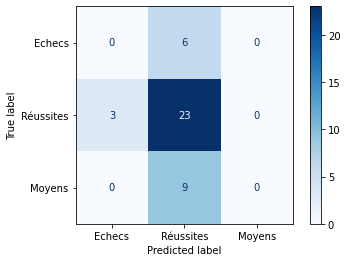

DATASET 7


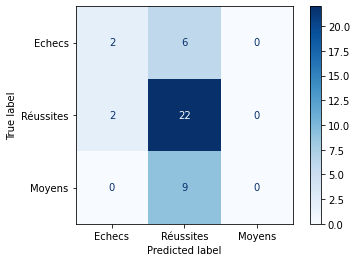

DATASET 8


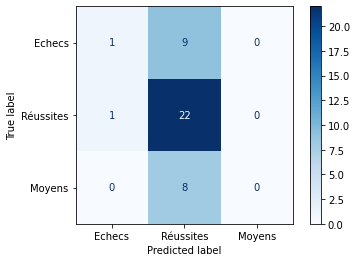

DATASET 9


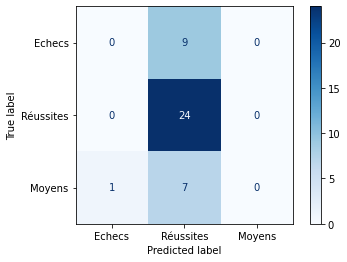

DATASET 10


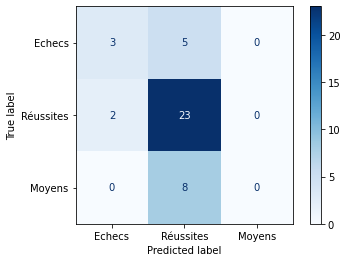

DATASET 11


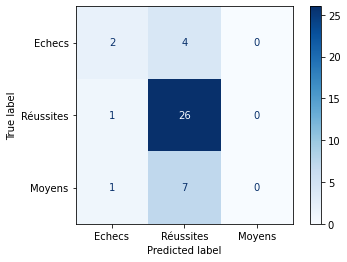

DATASET 12


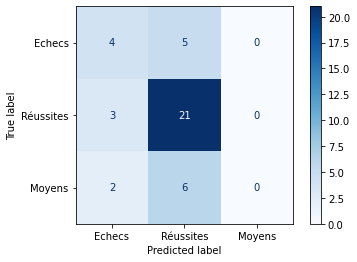

DATASET 13


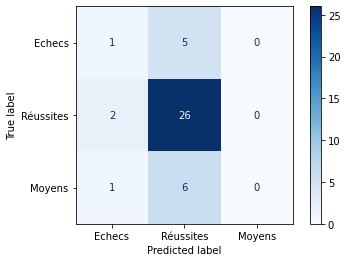

DATASET 14


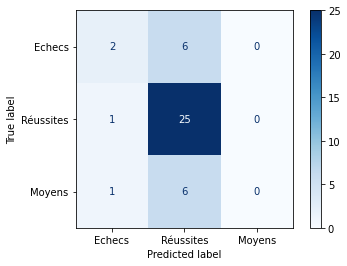

DATASET 15


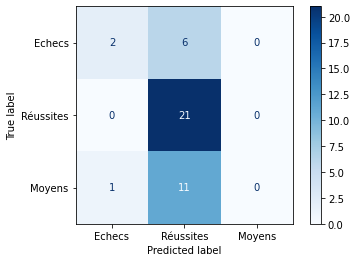

In [14]:
#Predict
y_pred = []
labels = ["Echecs", "Réussites","Moyens"]
for i in range(15):
    y_prediction = ANN[i].predict(X_test[i])
    y_prediction = y_prediction>0.5
    y_pred.append(y_prediction)
    
#Create confusion matrix and normalizes it over predicted (columns)
for i in range(15):
    print('DATASET',i+1)
    cm = confusion_matrix(y_test[i], y_pred[i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()